Section 1: Load Necessary Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

Section 2: Load and Explore the Dataset

In [37]:
file_path = '/content/archive (3).zip'
data = pd.read_csv(file_path)

# Explore dataset (e.g., data.head(), data.info(), data.describe())

Section 3: Data Preprocessing

In [38]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data[['Age']] = imputer.fit_transform(data[['Age']])

# Feature Selection and Encoding
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']
X = pd.get_dummies(X)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Section 4: Fine-Tuning the Model

In [39]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    # Add more parameters as needed for fine-tuning
}

In [40]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [41]:
# Handle missing values before GridSearchCV
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [42]:
# Perform Grid Search on the imputed data
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_imputed, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [43]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [44]:
# Train the best model on the entire training set (already imputed)
best_rf_model.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Make predictions on the test set (already imputed)
y_pred = best_rf_model.predict(X_test_imputed)

5. visualization

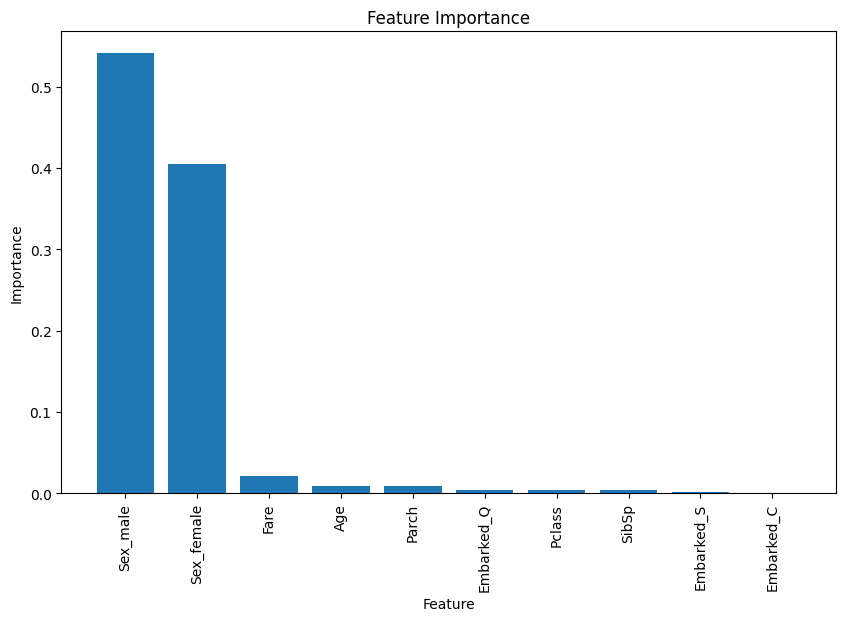

In [46]:
# Train the best model on the entire training set (already imputed)
best_rf_model.fit(X_train_imputed, y_train)

# Feature Importance Plot
feature_importances = best_rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train_imputed.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X_train_imputed.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [33]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Challenges Faced:

"Firstly, the dataset had missing values in crucial columns like 'Age.' To overcome this, I used the SimpleImputer from Scikit-learn to fill these missing values with the mean age."

"Next, I encountered categorical variables like 'Sex' and 'Embarked,' which needed encoding for the machine learning model. I used one-hot encoding to convert these categorical variables into a numerical format."

"During model training, I faced the challenge of fine-tuning the RandomForestClassifier for optimal performance. GridSearchCV helped in finding the best hyperparameters for the model."

Project Development Process:

"I started by loading the dataset and exploring its structure, understanding key features, and checking for missing values."

"Preprocessing involved handling missing values, feature selection, encoding categorical variables, and splitting the data into training and testing sets."

"I utilized GridSearchCV to fine-tune the model's hyperparameters for better accuracy and performance."

Results and Conclusion:

"After training the model and evaluating its performance, I visualized feature importances to understand which factors played a significant role in predicting survival on the Titanic."

"Overall, this project taught me valuable lessons in data preprocessing, model training, and tuning, enabling me to build a robust predictive model for survival prediction."

Closing Thoughts:

"Thank you for joining me on this journey! I hope this walkthrough was helpful. Feel free to explore the code and dataset, and don't hesitate to dive into your own machine learning projects. Happy coding!"
